# Report: 06/19/2019

## Brief: What was done previously
Previous work demonstrated favorable performance of discovered models with respect to noise, and missing data samples.
multiple mechanisms to improve the accuracy of prediction.
Discovered deep recurrent neural networks are capable of learning distributions well even given noisy observations or 
missing samples, with small amounts of noise and missing samples even improving network generalization.

## Hypothesis
1. Fully convolutional networks can model the dynamics of turbulence
1. Discovered convolutional network architectures 
1. Convolutional neural networks can approximate solutions to PDE's 
1. 
1. Hypothesis 1: Deep recurrent networks are tolerant of sensor noise below a certain magnitude (fixed gaussian per pixel noise)
2. Hypothesis 2: Deep recurrent networks are tolerant of missing samples (random per pixel dropout)
3. Hypothesis 3: Deep recurrent networks out perform standard baselines and previous models



## Summary of Main Results and Discussions
Modeled new architecture that uses skip layers to approximate PDE

New architecture achieves better performance fig ? with fewer model parameters. Additionally, this formulation is 
more natural for learned functions allowing approximation by traditional PDE equations after learning a deep model.


### Hypothesis 1 results and discussion
Leaned models handle noise suppression impressively well, dealing with noise with standard deviation twice as large as the range of the sample data. 

### Experiment 2: results and discussion
Put main result and conclusions here. Discuss importance/impact in terms of the project goals.


## Plan for next effort
Test architectures that remove the edge effect / dont penalize edge effects for patches
Perform hyper parameter optimization
Test training at multiple scales (LM-architecture)
Test the temporal consistency of networks
    

    


# Hypothesis 2
Consider learning a PDE of the form $u_t = f(u)$. The simplest approximation of $u_t = f(u)$ is to discretize the time 
derivative $u_t$ by $\frac{u_{n+1} - u_n}{\bigtriangleup t}$ and approximate the right hand side by $f(u_n)$. This leads
to the forward Euler scheme  
$$u_{n+1} = u_n + \bigtriangleup t f(u_n) \tag{1} \label{eqn:ode} $$
 
where $f(u_n)$ is learned using a deep network.  us to learn the dynamics of a system by approximate the dynamics of these features in the system by $f(u_n)$ by 


### Problem formulation
Let $x$ represent h patches of history $x = [x_{t-h}, ..., x_{t-1}]$ and y represent the target sequence $y = 
[x_{t}, x_{t+1},...,x_{t+l-1}]$.  We learn an encoder, $\phi(x) = u_0$, a decoder $\theta(u_n) = \hat{y}_n$ and a 
dynamics model $f(u_n)$ from equation \ref{eqn:ode}    
Rather 
than 
explicitly parameterizing the ODE on derivatives of $x$, we instead consider a system of ordinary differential
 equations of dimension m = 16. We then learn the encoding from 5 frames of history 
 encoding local features via
 
 Thus we learn a series of features $w_{enc}$ such that $u_0 = relu(x * w_{enc})$.
 We approximate the dynamics $f(u)$ by    $f(u_n)$ by


In [ ]:
import itertools
import src.predict_pde_recurrent
completed = [(5,5), (5,20), (5,40)]

for (history, pred_len) in itertools.product([5, 20], [5, 20, 40, 60]):
    if (history, pred_len) not in completed:
        name = 'conv_3-skip_1-cell'
        model = src.predict_pde_recurrent.train(net_name=name, pred_length=pred_len, history_length=5, num_batches=30000)

W0820 20:25:28.454469 176300 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:92: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0820 20:25:38.521584 176300 deprecation.py:323] From C:\Users\brandon\source\orbitalMechanics\src\dataLoader\turbulence.py:74: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
W0820 20:25:38.549518 176300 deprecation.py:323] From c:\python\python36\lib\site-packages\tensorflow\python\data\util\random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed i

Input shape: (?, 50, 50, 5)
Output shape: (60, ?, 50, 50)
Network shape: <unknown>
( 1942728300.0 0 )
( 5.790588 500 )
5.9157434 1000
5.5805445 1500


In [1]:
# import packages 
import importlib
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import os

# Hypothesis 1

Deep recurrent networks are tolerant to sensor noise below a certain magnitude

## Measure accuracy over increasing fixed gaussian sensor noise
We add increasing magnitudes of gaussian noise to the input and predict the clean original signal. We expect, for
high levels of noise, the model to over-fit to the noise. However, after some threshold we expect the model to learn to recover from small perturbations by learning the underlying distribution.

In [2]:
# Gaussian noise study (fixed input noise)
import numpy as np
import tensorflow as tf

from src.predict_pde_recurrent import train
from src.dataLoader.turbulence import Turbulence, RANDOM_SEED, LARGE_DATASET

# Use a fixed seed for noise    
np.random.seed(RANDOM_SEED)

for scale in [0, 0.01, 0.05, 0.1, 0.25]:
    noise_data = np.random.normal(size=(360, 279, 1000), scale=scale)
    
    loader = Turbulence(pred_length=40, dataset_idx=LARGE_DATASET, input_noise=noise_data, debug=False)
    
    train(loader=loader, dataset_idx=LARGE_DATASET, num_batches=50000, net_name='PDE_3-skip_1-cell_resnet_static_noise_{}'.format(scale))
    
    tf.reset_default_graph()


W0802 00:59:45.643858 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:100: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0802 00:59:45.643858 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:103: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0802 00:59:46.269069 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:108: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 00:59:52.628657 901200 deprecation.py:323] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:41: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0802 00:59:52.

Input shape: (?, 50, 50, 20)
Output shape: (40, ?, 50, 50)


W0802 00:59:52.909557 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:195: The name tf.losses.mean_squared_error is deprecated. Please use tf.compat.v1.losses.mean_squared_error instead.

W0802 00:59:52.909557 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:195: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0802 00:59:52.940903 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:210: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



Network shape: <unknown>


W0802 00:59:53.151744 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:214: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0802 00:59:53.151744 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:218: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0802 00:59:53.151744 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:227: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0802 00:59:53.151744 901200 deprecation_wrapper.py:119] From C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:231: The name tf.summary.image is deprecated. Please use tf.compat.v1.summary.image instead.

W0802 00:59:53.175184 901200 deprecation_wrapper.py:119] From C:\Users\brandon

( 486508.16 0 )
( 0.33462176 500 )
0.29724988 1000
0.2908485 1500
0.2943583 2000
0.2879434 2500
0.2963905 3000
0.2916533 3500
0.28112245 4000
0.2960895 4500
0.29022053 5000


ResourceExhaustedError: OOM when allocating tensor with shape[40,64,50,50,16] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node train/gradients/map/TensorArrayUnstack/TensorArrayScatter/TensorArrayScatterV3_grad/TensorArrayGatherV3 (defined at C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:211) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Errors may have originated from an input operation.
Input Source operations connected to node train/gradients/map/TensorArrayUnstack/TensorArrayScatter/TensorArrayScatterV3_grad/TensorArrayGatherV3:
 map/TensorArrayUnstack/range (defined at C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py:50)

Original stack trace for 'train/gradients/map/TensorArrayUnstack/TensorArrayScatter/TensorArrayScatterV3_grad/TensorArrayGatherV3':
  File "c:\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python\python36\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "c:\python\python36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "c:\python\python36\lib\asyncio\base_events.py", line 427, in run_forever
    self._run_once()
  File "c:\python\python36\lib\asyncio\base_events.py", line 1440, in _run_once
    handle._run()
  File "c:\python\python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\python\python36\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\python\python36\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\python\python36\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "c:\python\python36\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "c:\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\python\python36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\python\python36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "c:\python\python36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\python\python36\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\python\python36\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "c:\python\python36\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-6c8634f67e57>", line 16, in <module>
    train(loader=loader, dataset_idx=LARGE_DATASET, num_batches=50000, net_name='PDE_3-skip_1-cell_resnet_static_noise_{}'.format(scale))
  File "C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py", line 211, in train
    grads = adam.compute_gradients(pred_loss)
  File "c:\python\python36\lib\site-packages\tensorflow\python\training\optimizer.py", line 512, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 158, in gradients
    unconnected_gradients)
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\gradients_util.py", line 731, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\gradients_util.py", line 403, in _MaybeCompile
    return grad_fn()  # Exit early
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\gradients_util.py", line 731, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\tensor_array_grad.py", line 191, in _TensorArrayScatterGrad
    grad = g.gather(indices)
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\tensor_array_ops.py", line 1222, in gather
    return self._implementation.gather(indices, name=name)
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\tensor_array_ops.py", line 323, in gather
    element_shape=element_shape)
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\gen_data_flow_ops.py", line 7167, in tensor_array_gather_v3
    element_shape=element_shape, name=name)
  File "c:\python\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "c:\python\python36\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "c:\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()

...which was originally created as op 'map/TensorArrayUnstack/TensorArrayScatter/TensorArrayScatterV3', defined at:
  File "c:\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 26 identical lines from previous traceback]
  File "<ipython-input-2-6c8634f67e57>", line 16, in <module>
    train(loader=loader, dataset_idx=LARGE_DATASET, num_batches=50000, net_name='PDE_3-skip_1-cell_resnet_static_noise_{}'.format(scale))
  File "C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py", line 173, in train
    Pred = ped(X, pred_length)
  File "C:\Users\brandon\source\orbitalMechanics\src\predict_pde_recurrent.py", line 50, in ped
    elems=head
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\map_fn.py", line 231, in map_fn
    elem_ta.unstack(elem) for elem_ta, elem in zip(elems_ta, elems_flat)]
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\map_fn.py", line 231, in <listcomp>
    elem_ta.unstack(elem) for elem_ta, elem in zip(elems_ta, elems_flat)]
  File "c:\python\python36\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 193, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\tensor_array_ops.py", line 1256, in unstack
    return self._implementation.unstack(value, name=name)
  File "c:\python\python36\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 193, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\tensor_array_ops.py", line 351, in unstack
    indices=math_ops.range(0, num_elements), value=value, name=name)
  File "c:\python\python36\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 193, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\tensor_array_ops.py", line 370, in scatter
    name=name)
  File "c:\python\python36\lib\site-packages\tensorflow\python\ops\gen_data_flow_ops.py", line 7948, in tensor_array_scatter_v3
    flow_in=flow_in, name=name)
  File "c:\python\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "c:\python\python36\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)


## Explore results - Hypothesis 1

In this test given a 3 layer encoder/decoder model with 250 units per layer, we see that the performance of the model is 
resistant to up to 5% noise without any degradation. Further noise causes significant increases in L2 loss porportinal to the magnitude of of noise. 

In [2]:
# Compare accuracy of model with increasing fixed noise
import os
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly


plotly.offline.init_notebook_mode(connected=True)
plt.rc('text', usetex=True)
    
# Compare MSE vs magnitude of noise
noise = [2, 1, 0.75, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.0001, 0]
noise.reverse()
train_accuracy = [1.836e-5, 1.8441e-5, 2.0871e-5, 2.0525e-5, 2.0918e-5, 2.2431e-5, 2.2850e-5, 3.6688e-5, 6.5500e-5, 7.1376e-5, 7.3004e-5, 7.1560e-5, 1.1372e-4]
validation_accuracy = [1.932e-5, 1.9536e-5, 2.1711e-5, 2.1794e-5, 2.1213e-5, 2.3923e-5, 2.4532e-5, 4.2984e-5, 1.0194e-4, 2.9481e-4, 5.4323e-4, 7.5883e-4, 2.0583e-3]

# Create a trace
trace1 = go.Scatter(
    x = noise,
    y = validation_accuracy,
    name="validation"
)
trace2 = go.Scatter(
    x = noise,
    y = train_accuracy,
    name="train"
)

data = [trace1]
layout = go.Layout(
    title="Magnitude of Sensor Noise vs L2 Loss",
    xaxis=dict(
        type='log',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Standard Deviation of Added Gaussian Noise',
    ),
    yaxis=dict(
        type='log',
        tickmode = 'array',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Mean Squared Validation Error n=20',
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='static_noise_model')



c:\python\python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [3]:
data = [trace1, trace2]
layout = go.Layout(
    title="Magnitude of Sensor Noise vs L2 Loss",
    xaxis=dict(
        type='log',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Standard Deviation of Added Gaussian Noise',
    ),
    yaxis=dict(
        type='log',
        tickmode = 'array',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Mean Squared Error n = 20',
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='static_noise_model_comparison')

In [4]:
# Accuracy over time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# exp_root = 'F:\\'
exp_root = 'C:\\Users\\brandon\\source\\orbitalMechanics\\experiments\\turbulence\\pde'
exp_folders = ['conv_3-skip_1-cell_velocity_and_vorticity_field_1200s.mat_0.0005-lr_h-hist_l-pred'.format(h,l) 
                for h,l in completed]
npys = ['train_accuracy_by_time.npz', 'validation_accuracy_by_time.npz']

train_data = []
validation_data = []
diff = []

for i, directory in enumerate(exp_folders):
    # Load input, prediction and label
    try:
        if all([os.path.exists(os.path.join(exp_root, directory, f)) for f in npys]):
            ts = '30000'
            train_acc_dir, valid_acc_dir = [os.path.join(exp_root, directory, f) for f in npys]

            with np.load(train_acc_dir) as train_acc, np.load(valid_acc_dir) as valid_acc:
                train_data.append(
                    go.Scatter(
                        x = list(range(train_acc[ts].shape[0])),
                        y = train_acc[ts], 
                        name = 'sigma^2={}'.format(noise[i])))
                validation_data.append(
                    go.Scatter(
                        x = list(range(valid_acc[ts].shape[0])),
                        y = valid_acc[ts], 
                        name = 'sigma^2={}'.format(noise[i])))
                diff.append(
                    go.Scatter(
                        x = list(range(valid_acc[ts].shape[0])),
                        y = valid_acc[ts] - train_acc[ts], 
                        name = 'sigma^2={}'.format(noise[i])))
        else:
            print('skipped', directory)
    except KeyError:
        continue
            
layout = go.Layout(
    title="Prediction Accuracy by Time Horizon - Train",
    xaxis=dict(
        type='linear',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Predicted time step, t',
    ),
    yaxis=dict(
        type='linear',
        tickmode = 'array',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Mean squared validation error n = 20',
    )
)
    
fig = go.Figure(data=train_data, layout=layout)
py.iplot(fig, filename='acc_over_time_noise_study_train')



NameError: name 'completed' is not defined

In [16]:
layout = go.Layout(
    title="Prediction Accuracy by Time Horizon - Validation",
    xaxis=dict(
        type='linear',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Predicted time step, t',
    ),
    yaxis=dict(
        type='linear',
        tickmode = 'array',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Mean squared validation error n = 20',
    )
)
    
fig = go.Figure(data=validation_data, layout=layout)
py.iplot(fig, filename='acc_over_time_noise_study_validation')

ValueError: 
    Invalid value of type 'plotly.graph_objs.Scatter' received for the 'data' property of 
        Received value: Scatter({
    'name': 'validation',
    'text': [0.0, 0.0001, 0.0025, 0.005, 0.01, 0.025, 0.05],
    'x': [0.0001, 0.0002, 0.0026, 0.0051, 0.0101, 0.0251, 0.050100000000000006],
    'y': [0.010020785965025425, 0.012316141277551651, 0.012000023387372494,
          0.010259414091706276, 0.01776392199099064, 0.009534324519336224,
          0.009644226171076298]
})

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth', 'cone',
                     'contour', 'contourcarpet', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [15]:
layout = go.Layout(
    title="Prediction Accuracy by Time Horizon - Difference",
    xaxis=dict(
        type='linear',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Predicted time step, t',
    ),
    yaxis=dict(
        type='linear',
        tickmode = 'array',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Diffrence in MSE between train and validation; n = 20',
    )
)
    
fig = go.Figure(data=diff, layout=layout)
py.iplot(fig, filename='acc_over_time_noise_study_diff')

In [11]:
# Small magnitude of fixed noise increases generalization to new samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

exp_root = 'F:\\'
exp_folders = ['lstm_5_cells_dropout_60_static_noise_{}_velocity_and_vorticity_field_1200s.mat_lr0.0001'.format(n) for n in noise]
npys = ['train_accuracy_by_time.npz', 'validation_accuracy_by_time.npz']

train = []
validation = []
x = []


for i, directory in enumerate(exp_folders):
    # Load input, prediction and label
    if all([os.path.exists(os.path.join(exp_root, directory, f)) for f in npys]):
        ts = '50000'
        train_acc_dir, valid_acc_dir = [os.path.join(exp_root, directory, f) for f in npys]

        with np.load(train_acc_dir) as train_acc, np.load(valid_acc_dir) as valid_acc:
            try:
                train.append(train_acc[ts][19]) 
                validation.append(valid_acc[ts][19])
                x.append(noise[i] + 0.0001)
            except KeyError:
                continue
            
train_data = go.Scatter(
        x = x,
        y = train, 
        name = 'train',
        text=[str(p - 0.0001) for p in x])
validation_data = go.Scatter(
        x = x,
        y = validation, 
        name = 'validation',
        text=[str(p - 0.0001) for p in x])
            
layout = go.Layout(
    title="Sensor noise vs prediction error at step t+20",
    xaxis=dict(
        type='linear',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Standard deviation of added fixed gaussian noise',
    ),
    yaxis=dict(
        type='linear',
        tickmode = 'array',
        autorange=True,
        showexponent = 'all',
        exponentformat = 'e',
        title='Mean squared validation error at step t+20',
    )
)
data=[validation_data]
    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='acc_over_time_noise_study_train')


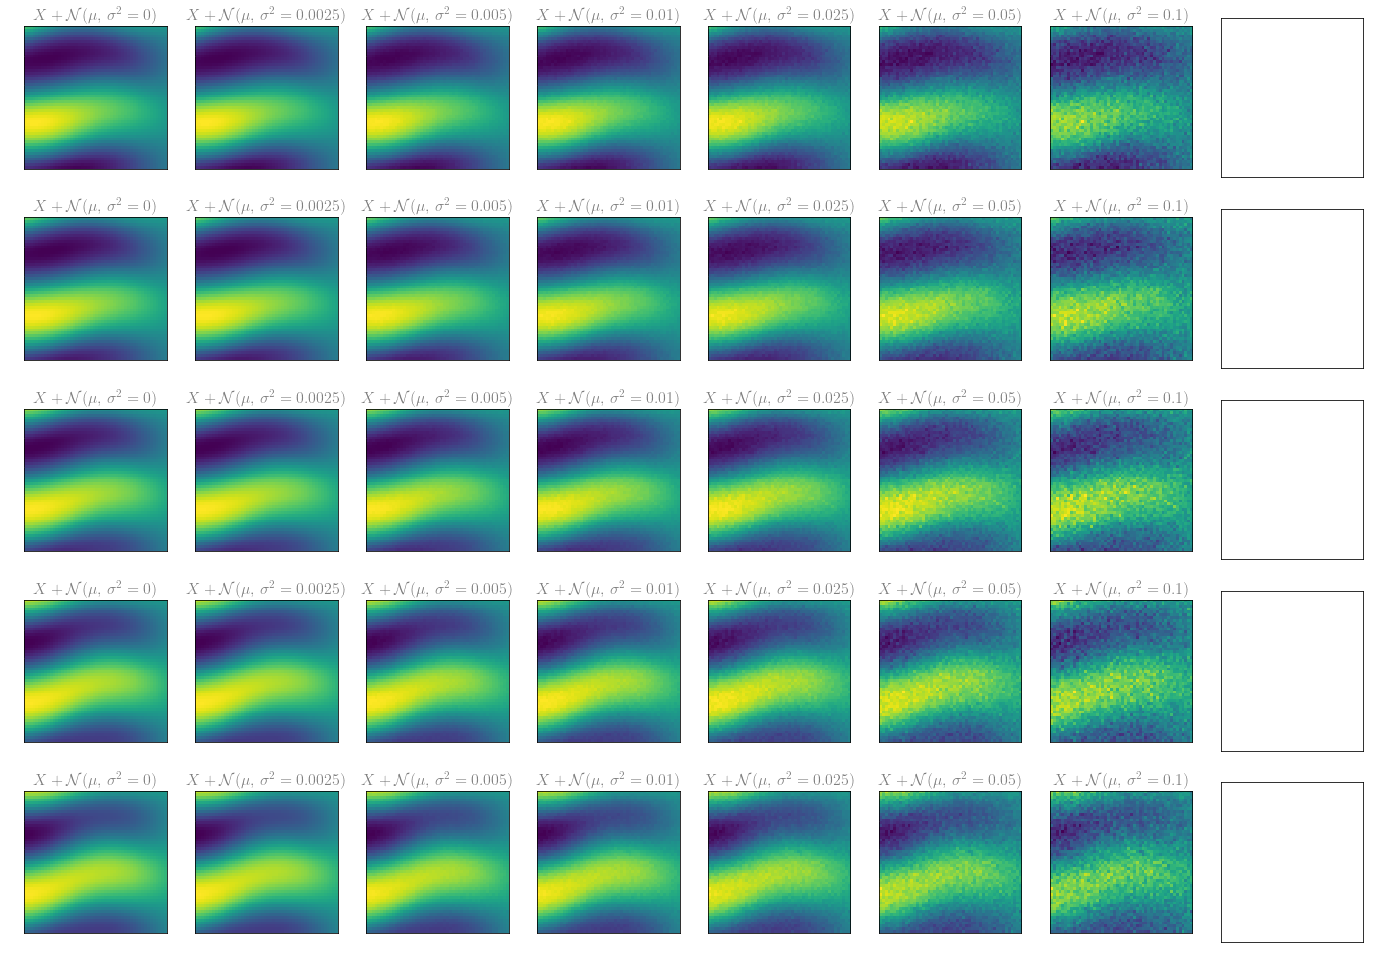

In [13]:
# Visualize noise data
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sub-plots for input sequence
plt.rc('text', usetex=True)
fig, plots = plt.subplots(5, 8, figsize=(24, 17))

exp_root = 'F:\\'
exp_folders = ['lstm_5_cells_dropout_60_static_noise_{}_velocity_and_vorticity_field_1200s.mat_lr0.0001'.format(n) for n in noise]
titles = ['Sequence + N $\sig = {} \mu = 0$'.format(n) for n in noise if n != 0.0001]
titles = [r"$X + \mathcal{N}(\mu,\,\sigma^{2}=" + str(n) + ") $" for n in noise if n != 0.0001]

for j in range(5):
    for i, directory in enumerate(exp_folders[:8]):
        for file in os.listdir(os.path.join(exp_root, directory)):
            if file.endswith('.npz') and file.startswith('inputs'):
                file_path = os.path.join(exp_root, directory, file)
                with np.load(file_path) as foo:
                    try:
                        plots[j, i].imshow(np.reshape(foo['100000'][j*4, 0,:], (50,50)))
                        plots[j, i].set_title(titles[i], fontsize=16, color='gray')
                    except KeyError:
                        continue
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
        
plt.show()

                
                



In [14]:
# Make videos of label, prediction, and difference
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Video parameters
fps = 10
height, width = 50, 50
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')

# Convert [0, 1] np.float32 to [0, 255] RGB cv2.uint8
cmap = plt.get_cmap('jet')
def convert_img(img):
    mapped = cmap(img)
    return cv2.normalize(mapped[:,:,:3], None, 255, 0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

def add_lables(img):
    font = cv2.FONT_HERSHEY_TRIPLEX 
    cv2.putText(img,'X',(10,40), font, 0.4,(0,0,0), 2, cv2.LINE_AA)
    cv2.putText(img,'f(X)',(10,90), font, 0.4,(0,0,0), 2, cv2.LINE_AA)
    cv2.putText(img,'Y',(10,140), font, 0.4,(0,0,0), 2, cv2.LINE_AA)
    cv2.putText(img,'|f(x) - y|^2', (10,190), font, 0.4,(0,0,0), 2, cv2.LINE_AA)
    cv2.putText(img,'X',(10,40), font, 0.4,(255,255,255), 1, cv2.LINE_AA)
    cv2.putText(img,'f(X)',(10,90), font, 0.4,(255,255,255), 1, cv2.LINE_AA)
    cv2.putText(img,'Y',(10,140), font, 0.4,(255,255,255), 1, cv2.LINE_AA)
    cv2.putText(img,'|f(x) - y|^2', (10,190), font, 0.4,(255,255,255), 1, cv2.LINE_AA)

# initialize video writer
video_filename = 'output.avi'

noise = [2, 1, 0.75, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.0001, 0]

exp_root = 'F:\\'
exp_folders = ['lstm_5_cells_dropout_60_static_noise_{}_velocity_and_vorticity_field_1200s.mat_lr0.0001'.format(n) for n in noise]
titles = ['Sequence + N $\sig = {} \mu = 0$'.format(n) for n in noise if n != 0.0001]
titles = [r"$X + \mathcal{N}(\mu,\,\sigma^{2}=" + str(n) + ") $" for n in noise if n != 0.0001]
npys = ['inputs.npz', 'predictions.npz', 'labels.npz']

for i, directory in enumerate(exp_folders):
    # Load input, prediction and label
    if all([os.path.exists(os.path.join(exp_root, directory, f)) for f in npys]):
        print('rendering video for', directory)
        ts = '10000'
        input_dir, pred_dir, label_dir = [os.path.join(exp_root, directory, f) for f in npys]

        with np.load(input_dir) as inputs, np.load(pred_dir) as predictions, np.load(label_dir) as labels:

                out = cv2.VideoWriter(directory + '.avi', fourcc, fps, (width*16, height*4))

            # First show input sequence
            for i in range(inputs[ts].shape[0]):
                top = np.concatenate(
                        [np.reshape(inputs[ts][i, j,:], (50,50)) for j in range(16)], axis=1)
                mid = np.concatenate(
                        [np.zeros((50, 50), dtype='float32') for _ in range(16)], axis=1)
                bot = np.concatenate(
                        [np.zeros((50, 50), dtype='float32') for _ in range(16)], axis=1)
                end = np.concatenate(
                        [np.zeros((50, 50), dtype='float32') for _ in range(16)], axis=1)
                         
                img = convert_img(np.concatenate([top, mid, bot, end], axis=0))
                add_lables(img)
                print(img.shape)
                out.write(img)
                
            # Then show prediction, label, and diffrence
            for i in range(labels[ts].shape[0]):
                top = np.concatenate(
                        [np.reshape(inputs[ts][19, j,:], (50,50)) for j in range(16)], axis=1)
                mid = np.concatenate(
                        [np.reshape(predictions[ts][i, j,:], (50,50)) for j in range(16)], axis=1)
                bot = np.concatenate(
                        [np.reshape(labels[ts][i, j,:], (50,50)) for j in range(16)], axis=1)
                end = np.concatenate(
                        [2**(np.reshape(predictions[ts][i, j,:], (50,50)) - np.reshape(labels[ts][i, j,:], (50,50))) for j in range(16)], axis=1)
                
                img = convert_img(np.concatenate([top, mid, bot, end], axis=0))
                add_lables(img)
                print(img.shape)
                out.write(img)

            # Now hold the last frame for 20 frames
            for _ in range(20):
                out.write(img)
            
            out.release()
            
    else:
        print('skipped', directory)
print('done')


skipped lstm_5_cells_dropout_60_static_noise_2_velocity_and_vorticity_field_1200s.mat_lr0.0001
skipped lstm_5_cells_dropout_60_static_noise_1_velocity_and_vorticity_field_1200s.mat_lr0.0001
skipped lstm_5_cells_dropout_60_static_noise_0.75_velocity_and_vorticity_field_1200s.mat_lr0.0001
skipped lstm_5_cells_dropout_60_static_noise_0.5_velocity_and_vorticity_field_1200s.mat_lr0.0001
skipped lstm_5_cells_dropout_60_static_noise_0.25_velocity_and_vorticity_field_1200s.mat_lr0.0001
rendering video for lstm_5_cells_dropout_60_static_noise_0.1_velocity_and_vorticity_field_1200s.mat_lr0.0001
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(2

(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
(200, 800, 3)
done


In [44]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))

# Hypothesis 2

Deep recurrent networks are tolerant to missing samples 

# Test 1

Train modls with increasing magnitudes of random missing (zeroed) samples and compare their performance


In [1]:
# Missing samples study (random missing pixels)
import numpy as np
import tensorflow as tf

from src.predict_turbulence_recurrent import train
from src.dataLoader.turbulence import Turbulence, RANDOM_SEED, LARGE_DATASET

# Use a fixed seed  
np.random.seed(RANDOM_SEED)

for s in [0.9, 0.75, 0.5, 0.25, 0.1]:
        
    loader = Turbulence(pred_length=20, dataset_idx=LARGE_DATASET, debug=False)
    
    train(loader=loader, dataset_idx=LARGE_DATASET, num_batches=100000, pixel_dropout=s,
          net_name='lstm_3_cells_20_pixel_dropout_{}'.format(s))
    
    tf.reset_default_graph()

C:\Users\brandon\source\orbitalMechanics
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Input shape: (20, ?, 2500)
Output shape: (20, ?, 50, 50)
Encoder input shape: [20, None, 2500]
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Padded input shape: [20, 64, 2500]
[20, 64, 250]
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Summary name Loss Histogram is illegal; using Loss_Histogram instead.
INFO:tensorflow:Summary name Mean Abs Error is illegal; using Mean_Abs_Error ins

KeyboardInterrupt: 

# Baselines
Comparing model perfomance 

In [ ]:
# Best lstm network
import numpy as np
import tensorflow as tf

from src.predict_turbulence_recurrent import train
from src.dataLoader.turbulence import Turbulence, LARGE_DATASET

loader = Turbulence(pred_length=20, dataset_idx=LARGE_DATASET, input_noise=noise_data, debug=False)

train(loader=loader, dataset_idx=LARGE_DATASET, num_batches=100000, net_name='lstm_3_cells_+20_{}'.format(scale))

tf.reset_default_graph()

# Comparing Models

In [41]:
# Make videos of label, prediction, and difference
import cv2

# Video parameters
fps = 8
height, width = 50, 50
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')

# Convert [0, 1] np.float32 to [0, 255] RGB cv2.uint8
cmap = plt.get_cmap('jet')
def convert_img(img):
    mapped = cmap(img)
    return cv2.normalize(mapped[:,:,:3], None, 255, 0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


# initialize video writer
video_filename = 'output.avi'



exp_root = './experiments/turbulence/pde'
exp_folders = ['conv']
npys = ['inputs.npz', 'predictions.npz', 'labels.npz']

for i, directory in enumerate(exp_folders):
    # Load input, prediction and label
    if all([os.path.exists(os.path.join(exp_root, directory, f)) for f in npys]):
        print('done')
        ts = '10000'
        input_dir, pred_dir, label_dir = [os.path.join(exp_root, directory, f) for f in npys]

        with np.load(input_dir) as inputs, np.load(pred_dir) as predictions, np.load(label_dir) as labels:

            out = cv2.VideoWriter(video_filename, fourcc, fps, (width, height*4))

            # First show input sequence
            for i in range(inputs[ts].shape[0]):
                top = convert_img(np.reshape(inputs[ts][i, 0,:], (50,50)))
                mid = np.zeros((50, 50, 3), dtype='uint8')
                bot = np.zeros((50, 50, 3), dtype='uint8')
                dif = np.zeros((50, 50, 3), dtype='uint8')
                print(np.concatenate([top, mid, bot, dif], axis=0).shape)
                out.write(np.concatenate([top, mid, bot, dif], axis=0))
                
            # Then show prediction and label
            for i in range(labels[ts].shape[0]):
                top = convert_img(np.reshape(inputs[ts][19, 0,:], (50,50)))
                mid = convert_img(np.reshape(predictions[ts][i, 0,:], (50,50)))
                bot = convert_img(np.reshape(labels[ts][i, 0,:], (50,50)))
                dif = convert_img(10*2**(np.reshape(predictions[ts][i, 0,:], (50,50)) - np.reshape(labels[ts][i, 0,:], (50,50))))
                print(np.concatenate([top, mid, bot, dif], axis=0).shape)
                out.write(np.concatenate([top, mid, bot, dif], axis=0))
                
            # Then hold last image
            for i in range(10):
                out.write(np.concatenate([top, mid, bot, dif], axis=0))

            # Now hold the last frame and show label and prediction beneth
            out.release()
            break
print('done')



done
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
(200, 50, 3)
done
